<a href="https://colab.research.google.com/github/MariaAbb7/ProgramesCursPython_B2/blob/main/ProjecteContaminantsBCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Es carreguen les llibreries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Es carrega el fitxer de dades i es mostren les primeres files

In [3]:
df = pd.read_csv('2023_10_Aire_BCN.csv')  #dades del mes d'octubre
#df_1 = pd.read_csv('2023_11_Aire_BCN.csv')
#df_2 = pd.read_csv('2023_12_Aire_BCN.csv')

df.head()

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,4,7,2023,10,1,1.0,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
1,8,Barcelona,19,Barcelona,4,7,2023,10,2,4.0,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
2,8,Barcelona,19,Barcelona,4,7,2023,10,3,10.0,...,1.0,V,2.0,V,1.0,V,1.0,V,1.0,V
3,8,Barcelona,19,Barcelona,4,7,2023,10,4,7.0,...,1.0,V,2.0,V,1.0,V,1.0,V,1.0,V
4,8,Barcelona,19,Barcelona,4,7,2023,10,5,1.0,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CODI_PROVINCIA    2015 non-null   int64  
 1   PROVINCIA         2015 non-null   object 
 2   CODI_MUNICIPI     2015 non-null   int64  
 3   MUNICIPI          2015 non-null   object 
 4   ESTACIO           2015 non-null   int64  
 5   CODI_CONTAMINANT  2015 non-null   int64  
 6   ANY               2015 non-null   int64  
 7   MES               2015 non-null   int64  
 8   DIA               2015 non-null   int64  
 9   H01               1908 non-null   float64
 10  V01               2015 non-null   object 
 11  H02               1955 non-null   float64
 12  V02               2015 non-null   object 
 13  H03               1912 non-null   float64
 14  V03               2015 non-null   object 
 15  H04               1976 non-null   float64
 16  V04               2015 non-null   object 


In [5]:
df.isna().sum()

CODI_PROVINCIA        0
PROVINCIA             0
CODI_MUNICIPI         0
MUNICIPI              0
ESTACIO               0
CODI_CONTAMINANT      0
ANY                   0
MES                   0
DIA                   0
H01                 107
V01                   0
H02                  60
V02                   0
H03                 103
V03                   0
H04                  39
V04                   0
H05                  38
V05                   0
H06                  38
V06                   0
H07                  38
V07                   0
H08                  38
V08                   0
H09                  36
V09                   0
H10                 102
V10                   0
H11                 119
V11                   0
H12                 119
V12                   0
H13                 100
V13                   0
H14                  64
V14                   0
H15                  28
V15                   0
H16                  27
V16                   0
H17             

Es seleccionen les columnes referents al dia, estació i contaminant. Es guarda amb el nom df_1

In [6]:
df_1=df[["DIA","ESTACIO","CODI_CONTAMINANT"]]
df_1

,DIA,ESTACIO,CODI_CONTAMINANT
0,1,4,7
1,2,4,7
2,3,4,7
3,4,4,7
4,5,4,7
...,...,...,...
2010,27,58,14
2011,28,58,14
2012,29,58,14
2013,30,58,14


Els valors de les mesures de cada hora es guarden en df_H

In [11]:
df_H = df.select_dtypes(include=[float])
df_H.isna().sum()
df_H.head()


,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,11.0,10.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,10.0,1.0,1.0,1.0,1.0,1.0,4.0,18.0,43.0,45.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0
3,7.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0,14.0,16.0,...,3.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,4.0,23.0,33.0,26.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0


In [12]:
#calculem l'estadística abans d'interpolar, per comparar amb el valors finals
df_H.describe()

,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
count,1908.000000,1955.000000,1912.000000,1976.000000,1977.000000,1977.000000,1977.000000,1977.000000,1979.000000,1913.000000,...,1987.000000,1988.000000,1988.000000,1988.000000,1987.000000,1987.000000,1983.000000,1987.000000,1987.000000,1987.000000
mean,328.189486,358.636394,352.153964,350.934919,348.429585,351.743824,365.696272,387.277436,391.714507,378.918468,...,356.412506,356.051559,355.927082,355.796308,356.967388,358.027781,355.653308,361.345979,359.809708,357.704378
std,1049.296877,1105.429907,1098.197745,1098.040214,1094.224180,1095.227687,1111.030933,1152.041722,1150.972718,1121.951267,...,1092.189898,1091.640721,1090.940294,1090.366611,1092.881936,1092.147155,1087.269364,1096.615069,1095.399365,1094.601567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.910000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.680000,1.530000,1.445000,1.407500,1.360000,1.800000,2.000000,2.000000,2.450000,3.000000,...,2.125000,2.047500,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,12.000000,11.000000,10.000000,10.000000,10.000000,9.100000,10.300000,13.600000,17.000000,16.800000,...,11.000000,11.000000,11.000000,11.000000,12.000000,13.000000,14.000000,14.000000,14.000000,13.000000
75%,34.000000,33.000000,30.000000,30.000000,29.000000,28.000000,30.000000,40.000000,47.000000,48.000000,...,41.000000,39.000000,40.250000,41.000000,40.000000,38.000000,36.000000,36.000000,36.000000,36.000000
max,5002.500000,5002.500000,5002.300000,5002.400000,5002.400000,5002.300000,5002.300000,7400.000000,6424.000000,5664.000000,...,5002.400000,5002.000000,5001.500000,5001.100000,5001.100000,5002.200000,5002.400000,5002.500000,5002.500000,5002.500000


Els valors buits, s'omplen interpolant les dades.

In [13]:
df_H.interpolate(method='linear', limit_direction='forward', axis=0,inplace=True)
df_H.isna().sum() #verifiquem nuls
df_H.describe() #calculem valors estadistics nous

,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
count,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,...,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,354.362447,348.292089,346.472898,345.250973,342.594511,345.805801,359.344434,380.628404,385.354496,379.279134,...,351.648141,351.446221,351.344660,351.214896,352.196918,353.238179,355.754400,356.526638,354.996948,352.911563
std,1088.959613,1090.442596,1088.832875,1088.500988,1084.889856,1085.874083,1101.536829,1142.251137,1141.674103,1119.531051,...,1085.316333,1085.021361,1084.318759,1083.748587,1086.003921,1085.280861,1087.396482,1089.723439,1088.514719,1087.716844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.910000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.825000,1.665000,1.480000,1.420000,1.430000,1.780000,2.000000,2.000000,3.000000,3.000000,...,2.115000,2.040000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,12.000000,10.210000,10.000000,10.000000,10.000000,9.240000,10.600000,13.550000,17.000000,17.000000,...,11.000000,11.000000,11.000000,11.000000,12.000000,13.000000,14.000000,14.000000,14.000000,13.000000
75%,35.000000,32.000000,29.450000,29.500000,28.000000,28.000000,30.000000,39.290000,46.000000,48.000000,...,39.500000,38.000000,39.500000,39.000000,39.000000,37.000000,35.800000,36.000000,35.000000,35.535000
max,5002.500000,5002.500000,5002.300000,5002.400000,5002.400000,5002.300000,5002.300000,7400.000000,6424.000000,5664.000000,...,5002.400000,5002.000000,5001.500000,5001.100000,5001.100000,5002.200000,5002.400000,5002.500000,5002.500000,5002.500000


Es calcula la mitjana diaria de cada fila

In [14]:
sums=df_H.sum( axis=1)
df_H["Mitjana_diaria"]=sums/24
df_H.head()

,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Mitjana_diaria
0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.208333
1,4.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,11.0,10.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.625000
2,10.0,1.0,1.0,1.0,1.0,1.0,4.0,18.0,43.0,45.0,...,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,7.500000
3,7.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0,14.0,16.0,...,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,4.500000
4,1.0,1.0,1.0,1.0,1.0,1.0,4.0,23.0,33.0,26.0,...,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,7.208333


S'uneixen les dues dades df_1 (dia,contaminant i estació) amb les dades i la mitjana

In [15]:
df_3 = pd.concat([df_1, df_H], axis=1)
df_3.describe()

,DIA,ESTACIO,CODI_CONTAMINANT,H01,H02,H03,H04,H05,H06,H07,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Mitjana_diaria
count,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,...,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,16.000000,47.892308,170.569231,354.362447,348.292089,346.472898,345.250973,342.594511,345.805801,359.344434,...,351.446221,351.344660,351.214896,352.196918,353.238179,355.754400,356.526638,354.996948,352.911563,357.286432
std,8.946492,12.754181,346.309480,1088.959613,1090.442596,1088.832875,1088.500988,1084.889856,1085.874083,1101.536829,...,1085.021361,1084.318759,1083.748587,1086.003921,1085.280861,1087.396482,1089.723439,1088.514719,1087.716844,1088.610563
min,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,43.000000,8.000000,1.825000,1.665000,1.480000,1.420000,1.430000,1.780000,2.000000,...,2.040000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.666667
50%,16.000000,54.000000,12.000000,12.000000,10.210000,10.000000,10.000000,10.000000,9.240000,10.600000,...,11.000000,11.000000,11.000000,12.000000,13.000000,14.000000,14.000000,14.000000,13.000000,15.250000
75%,24.000000,57.000000,106.000000,35.000000,32.000000,29.450000,29.500000,28.000000,28.000000,30.000000,...,38.000000,39.500000,39.000000,39.000000,37.000000,35.800000,36.000000,35.000000,35.535000,36.041667
max,31.000000,58.000000,999.000000,5002.500000,5002.500000,5002.300000,5002.400000,5002.400000,5002.300000,5002.300000,...,5002.000000,5001.500000,5001.100000,5001.100000,5002.200000,5002.400000,5002.500000,5002.500000,5002.500000,5001.862500


In [ ]:
#podem estudiar 8 estacions i 22 contaminants
df_3.nunique()

Seleccionem un contaminant per fer un primer estudi. El codi 8 correspon a NO2

In [17]:
#Seleccionen el contaminant 8 (NO2)
df_c8= df_3[df_3["CODI_CONTAMINANT"] == 8]
df_c8.describe()
df_c8.head()

,DIA,ESTACIO,CODI_CONTAMINANT,H01,H02,H03,H04,H05,H06,H07,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Mitjana_diaria
31,1,4,8,42.0,46.0,27.0,30.0,26.0,23.0,22.0,...,7.0,3.0,6.0,6.0,6.0,5.0,4.0,5.0,10.0,15.250000
32,2,4,8,14.0,21.0,22.0,23.0,21.0,32.0,36.0,...,7.0,10.0,8.0,8.0,14.0,15.0,16.0,33.0,31.0,22.000000
33,3,4,8,33.0,23.0,25.0,26.0,21.0,20.0,27.0,...,9.0,8.0,7.0,9.0,10.0,9.0,9.0,8.0,5.0,19.541667
34,4,4,8,26.0,19.0,7.0,10.0,12.0,17.0,30.0,...,18.0,17.0,17.0,12.0,15.0,18.0,12.0,13.0,11.0,23.458333
35,5,4,8,17.0,32.0,19.0,19.0,19.0,21.0,30.0,...,9.0,11.0,23.0,35.0,33.0,21.0,15.0,16.0,17.0,22.125000


In [18]:
df_c8.describe()

,DIA,ESTACIO,CODI_CONTAMINANT,H01,H02,H03,H04,H05,H06,H07,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Mitjana_diaria
count,248.000000,248.000000,248.0,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,16.000000,44.000000,8.0,20.070565,18.080645,17.348790,16.766129,14.945565,15.050403,17.913306,...,14.764113,15.330645,16.754032,17.830645,20.411290,20.620968,20.947581,20.544355,20.514113,19.736920
std,8.962359,16.257792,0.0,13.961955,14.556442,13.369169,12.703298,11.165919,10.854735,12.168621,...,11.465218,11.466089,12.330797,12.192350,13.879185,12.310815,12.680250,12.643270,13.689841,9.460462
min,1.000000,4.000000,8.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.458333
25%,8.000000,42.750000,8.0,9.000000,6.000000,6.000000,6.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,8.000000,9.000000,11.000000,12.000000,11.000000,11.000000,10.000000,13.093750
50%,16.000000,47.000000,8.0,17.000000,15.000000,15.000000,14.000000,13.000000,12.166667,16.000000,...,11.000000,12.000000,13.000000,13.000000,16.000000,18.000000,19.000000,18.000000,18.000000,18.750000
75%,24.000000,54.750000,8.0,28.000000,27.000000,25.000000,24.000000,22.000000,22.000000,26.000000,...,19.000000,21.250000,23.000000,23.000000,27.000000,27.000000,28.000000,26.250000,27.125000,25.166667
max,31.000000,58.000000,8.0,63.000000,69.000000,69.000000,67.000000,61.000000,56.000000,63.000000,...,79.000000,70.000000,68.000000,66.000000,107.000000,68.000000,72.000000,63.000000,66.000000,49.583333


S'agrupen els valors per estacions i es representa la mitjana diaria

[Text(0.5, 1.0, ' Mitjana contaminant per estació')]

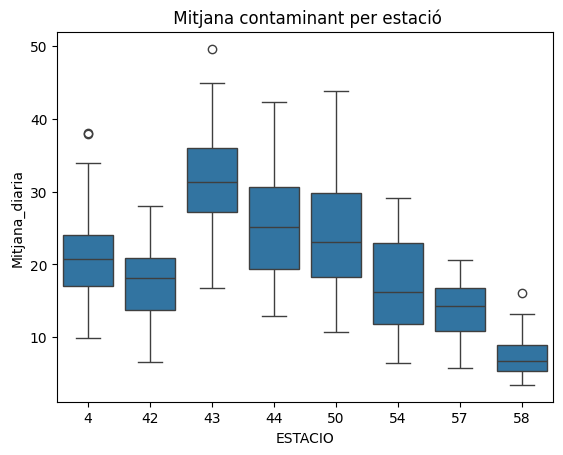

In [30]:
sns.boxplot(x='ESTACIO', y="Mitjana_diaria", data=df_c8).set (title = ' Mitjana contaminant NO2 per estació')



Seleccionem l'estació on s'han detectat més concentració de contaminant (la 43: la de l'Eixample)

In [31]:
#Estudi de les mesures amb valors màxims

df_c8M= df_c8[df_c8["ESTACIO"] == 43]
df_c8M.describe()
df_c8M.head()

,DIA,ESTACIO,CODI_CONTAMINANT,H01,H02,H03,H04,H05,H06,H07,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Mitjana_diaria
310,1,43,8,52.0,64.0,66.0,61.0,61.0,56.0,58.0,...,13.0,12.0,15.0,16.0,20.0,29.0,24.0,21.0,19.0,31.333333
311,2,43,8,16.0,13.0,29.0,16.0,13.0,20.0,30.0,...,40.0,51.0,61.0,52.0,50.0,45.0,33.0,28.0,19.0,38.125000
312,3,43,8,13.0,11.0,9.0,11.0,13.0,11.0,14.0,...,50.0,27.0,24.0,28.0,36.0,29.0,27.0,34.0,38.0,31.708333
313,4,43,8,23.0,12.0,9.0,13.0,11.0,20.0,22.0,...,24.0,18.0,19.0,17.0,20.0,22.0,20.0,15.0,15.0,26.187500
314,5,43,8,26.0,15.0,12.0,12.0,10.0,18.0,24.0,...,30.0,40.0,48.0,41.0,39.0,32.0,29.0,28.0,28.0,35.833333


Estudiem com varia el contaminant segons el dia en l'estació amb més detecció

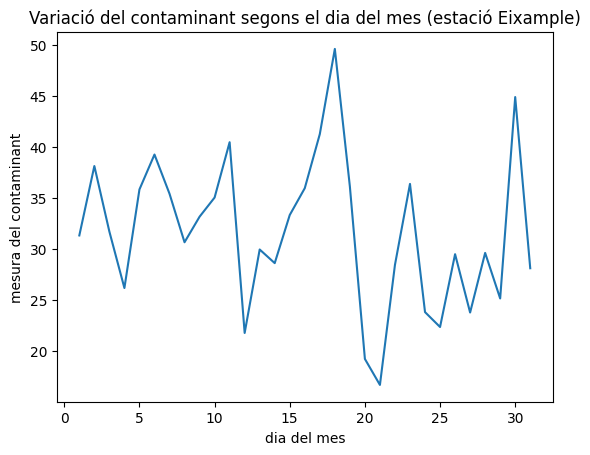

<Figure size 640x480 with 0 Axes>

In [45]:
#Mirem com varia el contaminant segons el dia

xpoints = df_c8M["DIA"]
ypoints = df_c8M["Mitjana_diaria"]

plt.plot(xpoints, ypoints)
plt.xlabel("dia del mes")
plt.ylabel("mesura del contaminant")
plt.title("Variació del contaminant segons el dia del mes (estació Eixample)")
plt.show()
fig = plt.figure()

<ipython-input-46-9a5d457399c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c8MF.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)


Text(0.5, 1.0, 'Variació contaminant segons hora del dia durant els caps de setmana (estació Eixample)')

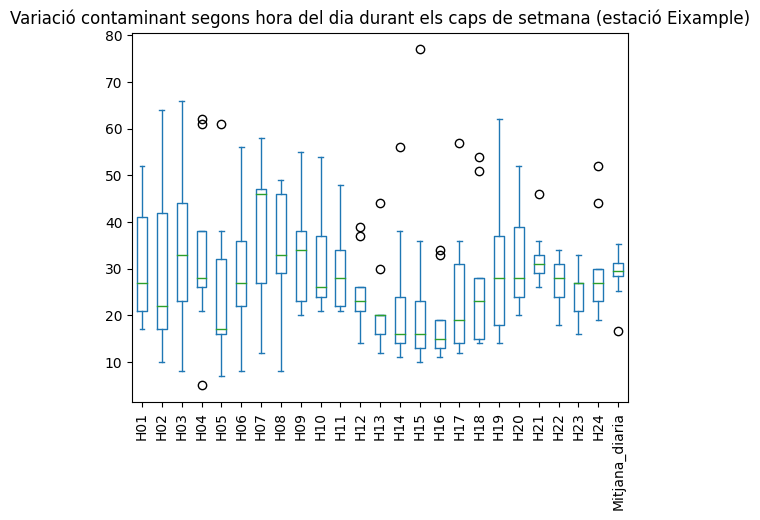

In [46]:
#Seleccionamos fines de semana
#En octubre los fines de semana han sido: 1,7,8,14,15,21,22,28,29

df_c8MF= df_c8M[(df_c8M["DIA"] == 1)|(df_c8M["DIA"] == 7)|(df_c8M["DIA"] == 8)|(df_c8M["DIA"] == 14)|(df_c8M["DIA"] == 15)|(df_c8M["DIA"] == 21)|(df_c8M["DIA"] == 22)|(df_c8M["DIA"] == 28)|(df_c8M["DIA"] == 29)]
df_c8MF

df_c8MF.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)
df_c8MF.head()
df_c8MF.plot(kind="box")
plt.xticks(rotation=90) #rotar els labels de l'eix x
plt.title("Variació contaminant segons hora del dia durant els caps de setmana (estació Eixample)")

<ipython-input-47-7eb691be154f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c8ML.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)


Text(0.5, 1.0, 'Variació contaminant segons hora del dia durant els dies laborables (estació Eixample)')

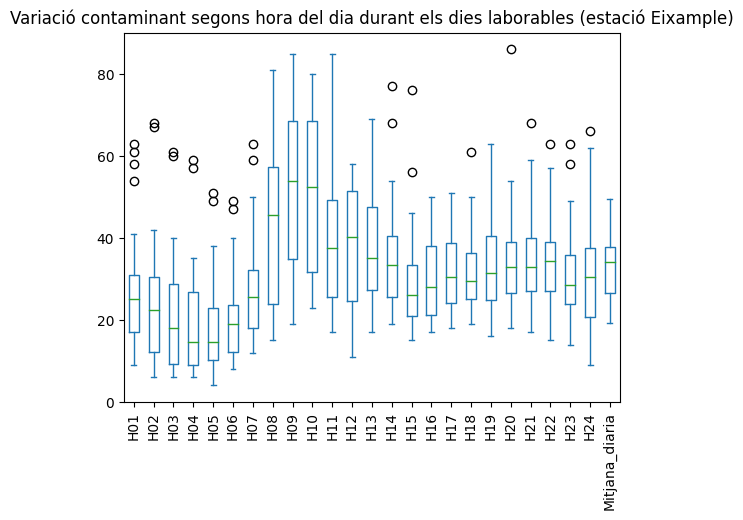

In [47]:
#Seleccionamos laborables
#En octubre los fines de semana han sido: 1,7,8,14,15,21,22,28,29

df_c8ML= df_c8M[(df_c8M["DIA"] != 1)&(df_c8M["DIA"] != 7)&(df_c8M["DIA"] != 8)&(df_c8M["DIA"] != 14)&(df_c8M["DIA"] != 15)&(df_c8M["DIA"] != 21)&(df_c8M["DIA"] != 22)&(df_c8M["DIA"] != 28)&(df_c8M["DIA"] != 29)]
df_c8ML.head()

df_c8ML.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)
df_c8ML.head()
df_c8ML.plot(kind="box")
plt.xticks(rotation=90) #rotar els labels de l'eix x
plt.title("Variació contaminant segons hora del dia durant els dies laborables (estació Eixample)")

In [48]:
#Estudi de les mesures amb valors mínims (estació 58 Observatori Fabra)

df_c8m= df_c8[df_c8["ESTACIO"] == 58]
df_c8m.describe()
df_c8m.head()

,DIA,ESTACIO,CODI_CONTAMINANT,H01,H02,H03,H04,H05,H06,H07,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Mitjana_diaria
1891,1,58,8,1.0,1.0,1.0,2.0,2.0,3.0,3.0,...,4.0,3.0,4.0,6.0,6.0,8.0,5.0,11.0,11.0,5.291667
1892,2,58,8,15.0,16.0,11.0,10.0,6.0,5.0,3.0,...,17.0,15.0,19.0,11.0,10.0,12.0,10.0,5.0,4.0,10.333333
1893,3,58,8,3.0,1.0,1.0,2.0,1.0,1.0,1.0,...,8.0,8.0,5.0,6.0,7.0,5.0,5.0,8.0,21.0,7.208333
1894,4,58,8,10.0,4.0,1.0,4.0,5.0,9.0,11.0,...,5.0,6.0,5.0,3.0,2.0,3.0,2.0,11.0,13.0,5.625000
1895,5,58,8,15.0,4.0,11.0,2.0,7.0,2.0,3.0,...,10.0,14.0,12.0,11.0,12.0,9.0,4.0,1.0,6.0,13.208333


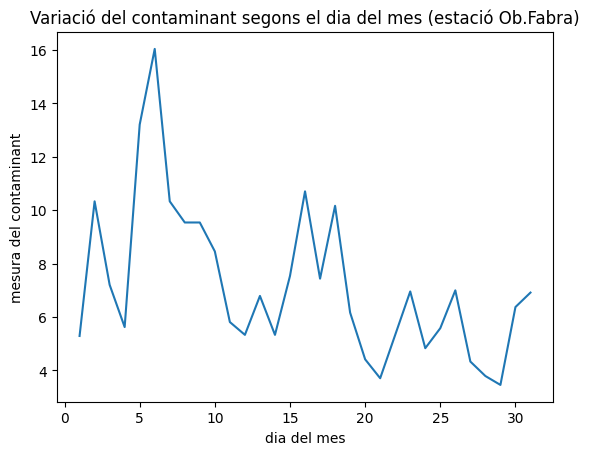

<Figure size 640x480 with 0 Axes>

In [50]:
#Mirem com varia el contaminant segons el dia

xpoints = df_c8m["DIA"]
ypoints = df_c8m["Mitjana_diaria"]

plt.plot(xpoints, ypoints)
plt.xlabel("dia del mes")
plt.ylabel("mesura del contaminant")
plt.title("Variació del contaminant segons el dia del mes (estació Ob.Fabra)")
plt.show()
fig = plt.figure()

<ipython-input-51-a4c8a05cb112>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c8mF.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)


Text(0.5, 1.0, 'Variació contaminant segons hora del dia durant els caps de setmana (estació Ob.Fabra)')

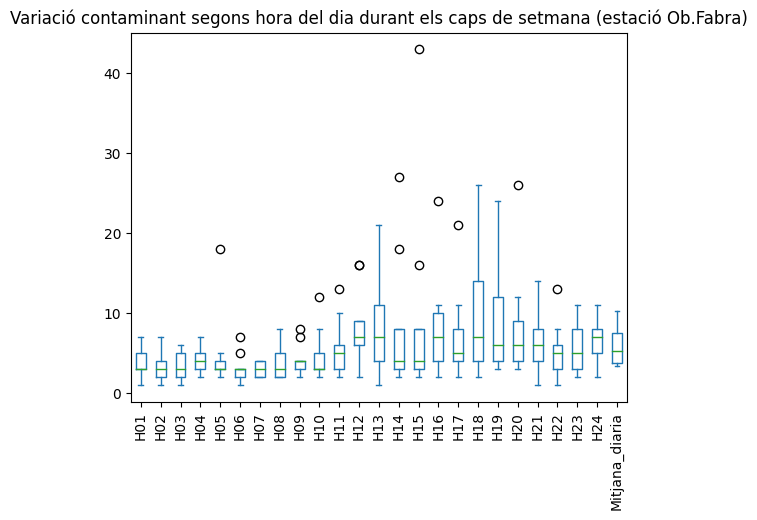

In [51]:
#Seleccionamos fines de semana
#En octubre los fines de semana han sido: 1,7,8,14,15,21,22,28,29

df_c8mF= df_c8m[(df_c8m["DIA"] == 1)|(df_c8m["DIA"] == 7)|(df_c8m["DIA"] == 8)|(df_c8m["DIA"] == 14)|(df_c8m["DIA"] == 15)|(df_c8m["DIA"] == 21)|(df_c8m["DIA"] == 22)|(df_c8m["DIA"] == 28)|(df_c8m["DIA"] == 29)]
df_c8mF

df_c8mF.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)
df_c8mF.head()
df_c8mF.plot(kind="box")
plt.xticks(rotation=90) #rotar els labels de l'eix x
plt.title("Variació contaminant segons hora del dia durant els caps de setmana (estació Ob.Fabra)")

<ipython-input-52-5e944c91ef48>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c8mL.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)


Text(0.5, 1.0, 'Variació contaminant segons hora del dia durant els dies laborables (estació Ob.Fabra)')

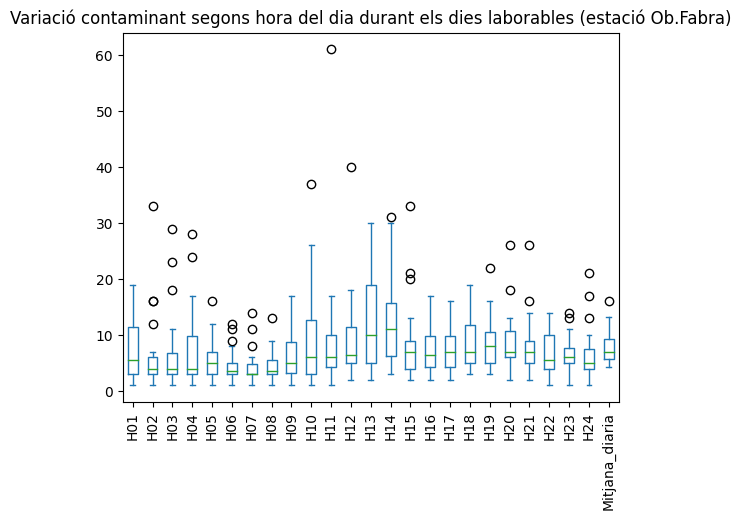

In [52]:
#Seleccionamos laborables
#En octubre los fines de semana han sido: 1,7,8,14,15,21,22,28,29

df_c8mL= df_c8m[(df_c8m["DIA"] != 1)&(df_c8m["DIA"] != 7)&(df_c8m["DIA"] != 8)&(df_c8m["DIA"] != 14)&(df_c8m["DIA"] != 15)&(df_c8m["DIA"] != 21)&(df_c8m["DIA"] != 22)&(df_c8m["DIA"] != 28)&(df_c8m["DIA"] != 29)]
df_c8mL.head()

df_c8mL.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)
df_c8mL.head()
df_c8mL.plot(kind="box")
plt.xticks(rotation=90) #rotar els labels de l'eix x
plt.title("Variació contaminant segons hora del dia durant els dies laborables (estació Ob.Fabra)")